In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("/Users/woowahan/Documents/Python/Lec_Data_Mining/Lec06/Default.csv", index_col=0)

In [4]:
df.head()

,default,student,balance,income
1,No,No,729.526495,44361.62507
2,No,Yes,817.180407,12106.13470
3,No,No,1073.549164,31767.13895
4,No,No,529.250605,35704.49394
5,No,No,785.655883,38463.49588


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 4 columns):
default    10000 non-null object
student    10000 non-null object
balance    10000 non-null float64
income     10000 non-null float64
dtypes: float64(2), object(2)
memory usage: 390.6+ KB


In [6]:
df['default'].value_counts()

No     9667
Yes     333
Name: default, dtype: int64

In [7]:
df['student'].value_counts()

No     7056
Yes    2944
Name: student, dtype: int64

In [8]:
df_dummies = pd.get_dummies(df['student'])

df_dummies.head()

,No,Yes
1,1,0
2,0,1
3,1,0
4,1,0
5,1,0


In [9]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

In [10]:
df['default_le'] = le.fit_transform(df['default'])

In [11]:
df1 = pd.concat([df, df_dummies], axis=1)

df1.head()

,default,student,balance,income,default_le,No,Yes
1,No,No,729.526495,44361.62507,0,1,0
2,No,Yes,817.180407,12106.13470,0,0,1
3,No,No,1073.549164,31767.13895,0,1,0
4,No,No,529.250605,35704.49394,0,1,0
5,No,No,785.655883,38463.49588,0,1,0


In [12]:
df2 = df1.loc[:, 'balance':]

In [13]:
df2.head()

,balance,income,default_le,No,Yes
1,729.526495,44361.62507,0,1,0
2,817.180407,12106.13470,0,0,1
3,1073.549164,31767.13895,0,1,0
4,529.250605,35704.49394,0,1,0
5,785.655883,38463.49588,0,1,0


In [14]:
from sklearn.linear_model import LogisticRegression

X = df2.drop('default_le', axis=1)
y = df2['default_le']

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [16]:
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(7500, 4)
(2500, 4)
(7500,)
(2500,)


In [17]:
logreg = LogisticRegression()

In [18]:
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [19]:
logreg.score(X_test, y_test)

0.96519999999999995

In [20]:
demo_df = pd.DataFrame({'city_num': [0, 1, 0, 2],
                        'city': ['서울', '뉴욕', '서울', '런던']})

In [21]:
demo_df

,city,city_num
0,서울,0
1,뉴욕,1
2,서울,0
3,런던,2


In [22]:
pd.get_dummies(demo_df)

,city_num,city_뉴욕,city_런던,city_서울
0,0,0,0,1
1,1,1,0,0
2,0,0,0,1
3,2,0,1,0


In [23]:
demo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
city        4 non-null object
city_num    4 non-null int64
dtypes: int64(1), object(1)
memory usage: 136.0+ bytes


In [24]:
demo_df['city_num'] = demo_df['city_num'].astype(str)

In [25]:
demo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
city        4 non-null object
city_num    4 non-null object
dtypes: object(2)
memory usage: 136.0+ bytes


In [26]:
pd.get_dummies(demo_df)

,city_뉴욕,city_런던,city_서울,city_num_0,city_num_1,city_num_2
0,0,0,1,1,0,0
1,1,0,0,0,1,0
2,0,0,1,1,0,0
3,0,1,0,0,0,1


In [133]:
ad = pd.read_csv("/Users/woowahan/Documents/Python/Lec_Data_Mining/Lec06/Advertising.csv", index_col=0)

In [104]:
ad.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [105]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 7.8 KB


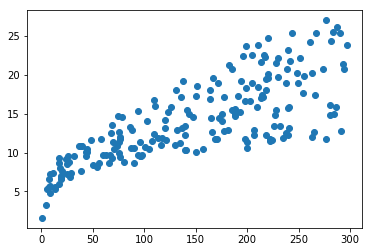

In [106]:
plt.scatter(ad['TV'], ad['Sales'])

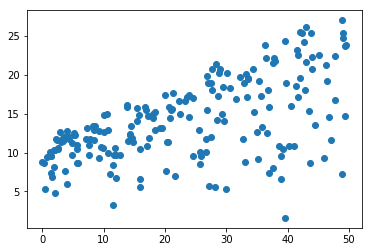

In [107]:
plt.scatter(ad['Radio'], ad['Sales'])

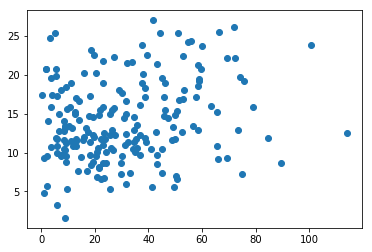

In [7]:
plt.scatter(ad['Newspaper'], ad['Sales'])

In [108]:
from sklearn.tree import DecisionTreeRegressor

In [109]:
X = ad['TV'][:, None]
y = ad['Sales']

In [110]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [111]:
reg = DecisionTreeRegressor(random_state=0)

In [112]:
reg.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=0,
           splitter='best')

In [113]:
reg.score(X_test, y_test)

0.6107462432279902

In [114]:
pred = reg.predict(X_test)
true = np.array(y_test)

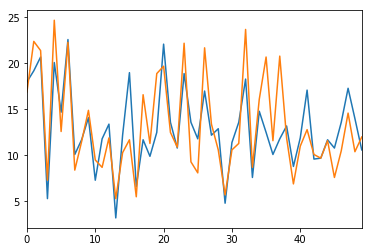

In [115]:
pd.Series(pred).plot()
pd.Series(true).plot()

- Mean Absolute Error (MAE) is the mean of the absolute value of the errors
$$ \frac 1n\sum_{i=1}^n|y_i - \hat{y}_i| $$

- Mean Squared Error (MSE) is the mean of the squared errors
$$ \frac 1n\sum_{i=1}^n(y_i - \hat{y}_i)^2 $$

- Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors
$$ \sqrt{\frac 1n\sum_{i=1}^n(y_i - \hat{y}_i)^2} $$

In [116]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_squared_error

print("R-sqaure:", r2_score(y_test, pred))
print("MAE:", mean_absolute_error(y_test, pred))
print("MSE:", mean_squared_error(y_test, pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, pred)))

('R-sqaure:', 0.6107462432279902)
('MAE:', 2.5039999999999996)
('MSE:', 10.528000000000002)
('RMSE:', 3.24468796650772)


In [117]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(X_train, y_train)

In [118]:
lr.score(X_test, y_test)

0.66061203903304933

In [119]:
pred_lr = lr.predict(X_test)
true = np.array(y_test)

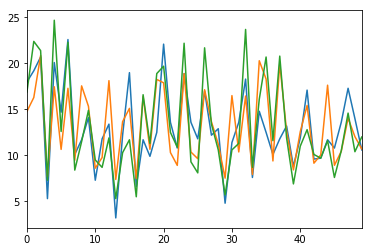

In [120]:
pd.Series(pred).plot()
pd.Series(pred_lr).plot()
pd.Series(true).plot()

In [121]:
print("R-sqaure:", r2_score(y_test, pred_lr))
print("MAE:", mean_absolute_error(y_test, pred_lr))
print("MSE:", mean_squared_error(y_test, pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, pred_lr)))

('R-sqaure:', 0.66061203903304933)
('MAE:', 2.2737705943708724)
('MSE:', 9.1792985703997925)
('RMSE:', 3.0297357261648732)


In [133]:
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

In [135]:
y.describe()

count    200.000000
mean      14.022500
std        5.217457
min        1.600000
25%       10.375000
50%       12.900000
75%       17.400000
max       27.000000
Name: Sales, dtype: float64

In [141]:
#pd.cut(y, bins=[0,10,13,17,27], labels=range(4)).head()

In [142]:
pd.qcut(y, 5, labels=range(5))[:10]

1     4
2     1
3     0
4     3
5     2
6     0
7     1
8     2
9     0
10    1
Name: Sales, dtype: category
Categories (5, int64): [0 < 1 < 2 < 3 < 4]

In [140]:
pd.qcut(y, 5, labels=range(5)).value_counts()

0    44
4    40
2    40
3    39
1    37
Name: Sales, dtype: int64

In [143]:
y_bin = pd.qcut(y, 5, labels=range(5))

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, random_state=42)

In [145]:
y_train

[2, 1, 0, 0, 0, ..., 0, 4, 4, 2, 2]
Length: 150
Categories (5, int64): [0 < 1 < 2 < 3 < 4]

In [146]:
reg = DecisionTreeRegressor(random_state=0).fit(X_train, y_train)

In [147]:
pred = reg.predict(X_test)
true = np.array(y_test)

In [148]:
print("R-sqaure:", r2_score(y_test, pred))
print("MAE:", mean_absolute_error(y_test, pred))
print("MSE:", mean_squared_error(y_test, pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, pred)))

('R-sqaure:', 0.51877934272300463)
('MAE:', 0.65000000000000002)
('MSE:', 1.0249999999999999)
('RMSE:', 1.0124228365658292)


In [152]:
lr = LinearRegression().fit(X_train, y_train)

In [153]:
pred_lr = lr.predict(X_test)
true = np.array(y_test)

In [154]:
print("R-sqaure:", r2_score(y_test, pred_lr))
print("MAE:", mean_absolute_error(y_test, pred_lr))
print("MSE:", mean_squared_error(y_test, pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, pred_lr)))

('R-sqaure:', 0.67800693289163516)
('MAE:', 0.67163706564873227)
('MSE:', 0.68584523294081701)
('RMSE:', 0.82815773433616924)


In [178]:
ad.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [212]:
X = ad.drop("Sales", axis=1)
y = ad['Sales']

In [213]:
print(X.shape)
print(y.shape)

(200, 3)
(200,)


In [186]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [187]:
lr = LinearRegression().fit(X_train, y_train)

In [188]:
lr.score(X_test, y_test)

0.85763967453208922

In [192]:
from sklearn.preprocessing import PolynomialFeatures

In [199]:
# X ** 3차항 추가
# include_bias=True 절편 1 추가

poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X)

In [201]:
pd.DataFrame(X_poly).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,230.1,37.8,69.2,52946.01,8697.78,15922.92,1428.84,2615.76,4788.64,1.218288e+07,2001359.178,3663863.892,328776.084,601886.376,1101866.064,54010.152,98875.728,181010.592,331373.888
1,44.5,39.3,45.1,1980.25,1748.85,2006.95,1544.49,1772.43,2034.01,8.812112e+04,77823.825,89309.275,68729.805,78873.135,90513.445,60698.457,69656.499,79936.593,91733.851
2,17.2,45.9,69.3,295.84,789.48,1191.96,2106.81,3180.87,4802.49,5.088448e+03,13579.056,20501.712,36237.132,54710.964,82602.828,96702.579,146001.933,220434.291,332812.557
3,151.5,41.3,58.5,22952.25,6256.95,8862.75,1705.69,2416.05,3422.25,3.477266e+06,947927.925,1342706.625,258412.035,366031.575,518470.875,70444.997,99782.865,141338.925,200201.625
4,180.8,10.8,58.4,32688.64,1952.64,10558.72,116.64,630.72,3410.56,5.910106e+06,353037.312,1909016.576,21088.512,114034.176,616629.248,1259.712,6811.776,36834.048,199176.704


In [202]:
X_poly.shape

(200, 19)

In [203]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state=0)

In [205]:
lr_poly = LinearRegression().fit(X_train, y_train)

In [206]:
lr_poly.score(X_test, y_test)

0.97693686058071483

In [61]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [62]:
boston = load_boston()

In [63]:
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)

In [64]:
scaler = MinMaxScaler(feature_range=(0,1))

In [65]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [66]:
X_train_scaled = scaler.transform(X_train)

In [67]:
X_test_scaled = scaler.transform(X_test)

In [77]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, interaction_only=False).fit(X_train_scaled) # interaction_only = True : 상호작용 항만 선택

In [78]:
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

In [79]:
print(X_train.shape)
print(X_train_poly.shape)

(379, 13)
(379, 105)


In [80]:
print(poly.get_feature_names())

['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x12', 'x12^2']


In [81]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train_scaled, y_train)

In [82]:
ridge.score(X_test_scaled, y_test)

0.62137014084544007

In [85]:
X_train_scaled.shape

(379, 13)

In [87]:
ridge = Ridge().fit(X_train_poly, y_train)

In [88]:
ridge.score(X_test_poly, y_test)

0.75342338480546911

In [89]:
X_train_poly.shape

(379, 105)

In [92]:
ridge = Ridge().fit(X_train, y_train)

In [93]:
ridge.score(X_test, y_test)

0.62651162237674285

In [94]:
X_train.shape

(379, 13)

In [155]:
dfX = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy = pd.DataFrame(boston.target, columns=["target"])

df = pd.concat([dfX, dfy], axis=1)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


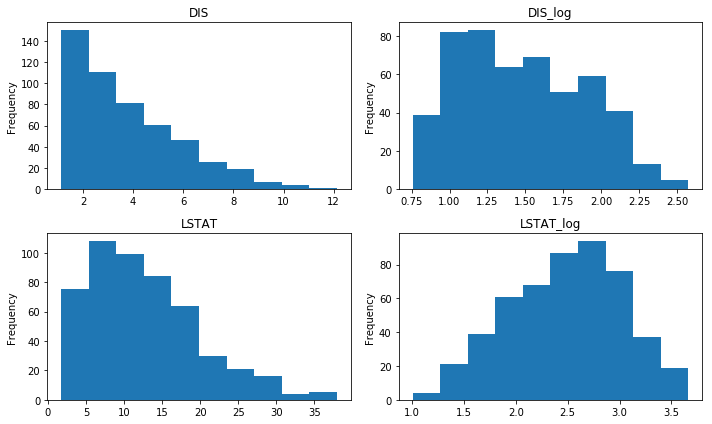

In [158]:
plt.figure(figsize=(10,6))

plt.subplot(221)
df['DIS'].plot(kind='hist')
plt.title("DIS")

plt.subplot(222)
np.log(df['DIS'] + 1).plot(kind='hist')
plt.title("DIS_log")

plt.subplot(223)
df['LSTAT'].plot(kind='hist')
plt.title("LSTAT")

plt.subplot(224)
np.log(df['LSTAT'] + 1).plot(kind='hist')
plt.title("LSTAT_log")

plt.tight_layout()

In [49]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

In [50]:
cancer.data.shape

(569, 30)

In [51]:
cancer.target.shape

(569,)

In [52]:
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))

In [53]:
noise.shape

(569, 50)

In [54]:
X_w_noise = np.hstack([cancer.data, noise])

In [55]:
X_w_noise.shape

(569, 80)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X_w_noise, cancer.target, random_state=0, test_size=.5)

In [66]:
select = SelectPercentile(percentile=50)

In [67]:
select.fit(X_train, y_train)

SelectPercentile(percentile=50,
         score_func=<function f_classif at 0x10d415410>)

In [68]:
X_train_selected = select.transform(X_train)

In [69]:
X_train_selected.shape

(284, 40)

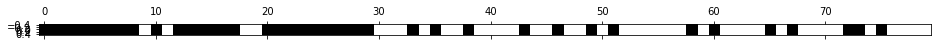

In [70]:
mask = select.get_support()
plt.matshow(mask.reshape(1,-1), cmap='gray_r')

In [71]:
from sklearn.feature_selection import SelectKBest, f_classif

kbest = SelectKBest(k=40, score_func=f_classif)
X_train_kbest = kbest.fit_transform(X_train, y_train)

In [72]:
X_train_kbest.shape

(284, 40)

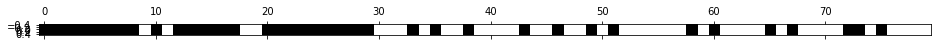

In [73]:
mask = kbest.get_support()
plt.matshow(mask.reshape(1,-1), cmap='gray_r')

In [74]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [75]:
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.92982456140350878

In [76]:
X_test_kbest = kbest.transform(X_test)

In [77]:
lr.fit(X_train_kbest, y_train)
lr.score(X_test_kbest, y_test)

0.94035087719298249

In [78]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

In [79]:
select = SelectFromModel(RandomForestClassifier(n_estimators = 100, random_state=42), threshold = "median")

In [80]:
select.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False),
        prefit=False, threshold='median')

In [81]:
X_train_l1 = select.transform(X_train)

In [82]:
print(X_train.shape)
print(X_train_l1.shape)

(284, 80)
(284, 40)


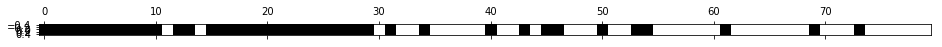

In [83]:
mask = select.get_support()
plt.matshow(mask.reshape(1,-1), cmap='gray_r')

In [84]:
X_test_l1 = select.transform(X_test)

In [85]:
lr = LogisticRegression().fit(X_train_l1, y_train)

In [86]:
lr.score(X_test_l1, y_test)

0.9508771929824561

In [87]:
from sklearn.feature_selection import RFE

In [88]:
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select = 40)

In [89]:
select.fit(X_train, y_train)

RFE(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False),
  n_features_to_select=40, step=1, verbose=0)

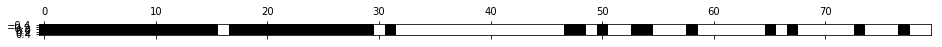

In [90]:
mask = select.get_support()
plt.matshow(mask.reshape(1,-1), cmap='gray_r')

In [92]:
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)

In [93]:
print(X_train_rfe.shape)
print(X_test_rfe.shape)

(284, 40)
(285, 40)


In [94]:
lr = LogisticRegression().fit(X_train_rfe, y_train)
lr.score(X_test_rfe, y_test)

0.9508771929824561